<a id='top'></a>

# CSCI3022 S21
# Homework 3: Probability and Simulations
***

**Name**: Jaryd Meek

***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1 (Simulation): Let's play some "games"!
***

One of the big payoffs of simulation is that it can let us answer some probability questions that are otherwise quite difficult.  We can instead just simulate the process and get approximate results based on simulation.



***
### A) Poker... pen-and-paper
Game number 1... is Poker!

A common example for discrete counting and probability questions are poker hands.  Consider using a standard 52-card playing deck, with card faces `[A,2,3,4,5,6,7,8,9,10,J,Q,K]` across the standard 4 suits: `[C,D,H,S]`.

Suppose we draw 5 cards at random from the deck.  What is the exact probability that we have a "full house:" a hand with 3 copies of one card face type (of any suits) and the other two cards matches of a different card face type (of any suits)?  Typeset your work below.  You may leave your answer in terms of a ratio of products, but you should simplify away any combinatoric notation such as ${n \choose k}$ or $P(n,k)$.


**SOLUTION**

There are 5 cards that we are selecting, with three of them being the same. 

Let $A, A, A, B, B$ represent the set of cards, with A being the three matching cards (of different suits) and B,C being any other cards in the deck

There are $C(13,1)$ ways to choose the values for A, then $C(4,3)$ ways to choose the suits. For B there are $C(12,1)$ ways to choose the value for B, and $C(4,2)$ ways to choose the suit.

There are $C(52,5)$ ways to pick a 5 card hand from the deck.

Therefore, the total probability is -

$$ \frac{C(13,1) \cdot C(4,3) \cdot C(12,1) \cdot C(4,2) }{C(52,5)} \approx 0.144\%$$




***
### B) Poker with computers!

Write a simulation that draws a hand of 5 cards from a standard 52-card deck. Repeat this simulation 10000 times, and report how many "full house" hands were observed. Verify that the result is consistent with your answer to part A.

NB: The function `np.unique` can make checking hands easier.  Your actual simulation should have 52 distinct cards, even if we're only using the faces (and not suits) for the check of full house.

In [2]:
cards = ["CA", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "CJ", "CQ", "CK", "DA", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10", "DJ", "DQ", "DK", "HA", "H2", "H3", "H4", "H5", "H6", "H7", "H8", "H9", "H10", "HJ", "HQ", "HK", "SA", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "SJ", "SQ", "SK"]

def pickHand():
    np.random.shuffle(cards)
    hand = np.random.choice(cards, 5, replace=False)
    
    #Check if full house
    check = []
    for x in hand:
        check.append(x[1:])
        
    output = [False,False]
    for x in check:
        if check.count(x) == 3: 
            output[0] = True
            continue
        if check.count(x) == 2: 
            output[1] = True
            continue

    if output == [True, True]:
        return True
    else:
        return False
    
def FHSimulation():
    simulation = [pickHand() for x in range(10000)]
    print(f"Probability of a Full House hand: {sum(simulation)*100/len(simulation):0.2f}%")
    
FHSimulation()


Probability of a Full House hand: 0.17%


**Probability when I ran it -> 0.15%**

So, our calculated probability is 0.14%, and our experimental probability is 0.15%. These are VERY close, so we can assume that our calculation is correct.

The Riddler is a column on the website https://fivethirtyeight.com that posts logic, math, and probability puzzles each week.  Some of puzzles can be attacked by simulation and discrete probability: things that we have the tools to solve!

Parts C/Eare former Riddler prompts.


***
### C) A "solitaire" game

On snowy afternoons, you like to play a solitaire “game” with a standard, randomly shuffled deck of 52 cards. You start dealing cards face up, one at a time, into a pile. As you deal each card, you also speak aloud, in order, the 13 card faces in a standard deck: ace, two, three, etc. (When you get to king, you start over at ace.) You keep doing this until the rank of the card you deal matches the rank you speak aloud, in which case you lose. You win if you reach the end of the deck without any matches.

Set up a simulation to answer the prompt: what is the probability that you win?

Note that your final result should be *close* to the value of $(12/13)^{52}$, which would be the theoretical result if each card flip was independent.  Was it higher or lower?  Does this match your intuition?

In [3]:
faces = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]

def solitare():
    np.random.shuffle(cards)
    for x in range(0, 52):
        if faces[x%13] == cards[x][1:]:
            return False
    return True
        
def solitareSimulation():
    simulation = [solitare() for x in range(10000)]
    print(f"Probability of winning this solitare hand: {sum(simulation)*100/len(simulation):0.2f}%")
    
solitareSimulation()


Probability of winning this solitare hand: 1.69%


**Probability when I ran it -> 1.75%**

So, our calculated probability is ~1.56%, and our experimental probability is ~1.75%. These are close, so we can assume that our calculation is correct.

***
### D) Random motion

Suppose that all city streets follow a grid layout, running north-south and east-west. You’re driving north when you decide to play a little game. Every time you reach an intersection, you randomly turn left or right, each with a 50 percent chance.

After driving through 10 intersections, what is the probability that you are still driving north?


In [4]:
directions = ["north", "east", "south", "west"]

def turn(head, direction):
    index = directions.index(head)
    if direction == "left":
        index -=1
    else:
        index += 1
    
    if index == -1:
        index = 3
    if index == 4:
        index = 0
    return directions[index]


def drive():
    turns = np.random.randint(2, size=10)
    head = "north"
    for x in range(10):
        if turns[x] == 0:
            head = turn(head, "left")
        elif turns[x] == 1:
            head = turn(head, "right")
    if head == "north":
        return True
    else:
        return False
    
def driveSim():
    simulation = [drive() for x in range(10000)]
    print(f"Probability of driving north: {sum(simulation)*100/len(simulation):0.2f}%")
    
driveSim()

Probability of driving north: 50.28%


After driving through 10 intersections, you have a roughly 50% chance of driving north. This makes sense coneceptually.

Before the first turn, you are going north
After 1 turn, you are going either east or west
After 2 turns you are either going north or south

and so on, so when you hit the 10th intersection, you are going either east or west, and you MUST turn meaning you have a ~50% chance of going north and a roughly ~50% chance of going south

***
### E) More Random motion

Now suppose that at every intersection, there’s a one-third chance you turn left, a one-third chance you turn right and a one-third chance you drive straight. Create a set of simulations that record which direction you're driving 11 times.  

It is recommended that you save the results in a data frame of the form below:

| Start | T1 | T2 | T3 | ... | T10 |
| --- | --- |
| N | E | N | W| ... | N |
| N | W | W | S | ... | E|
| N | W | N | E | ... | W|

then create a plot where the $x$ axis is "numbers of turns made" from 0 to 10, and the $y$ axis is "probability that you're driving North."


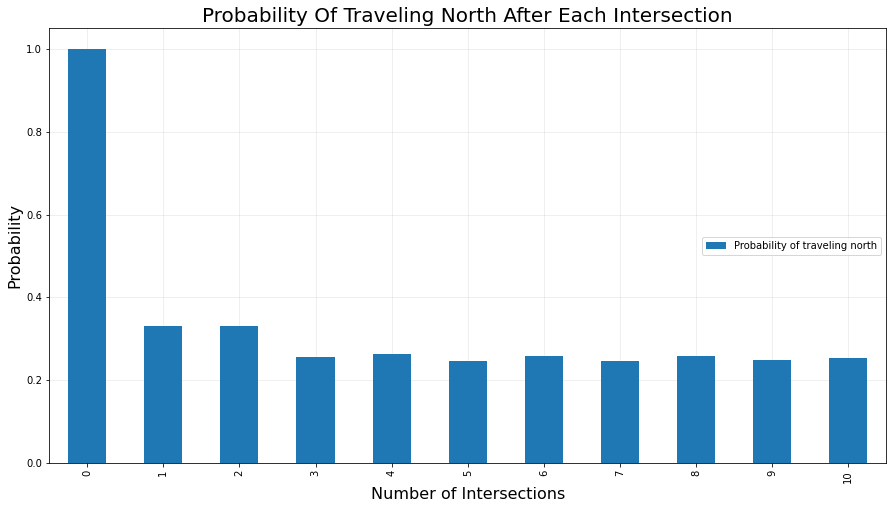

In [5]:
array = [0,0,0,0,0,0,0,0,0,0,0]
def drive2(array):
    turns = np.random.randint(3, size=11)
    head = "north"
    for x in range(11):
        if head == "north":
            array[x] += 1
        if turns[x] == 0:
            head = turn(head, "left")
        elif turns[x] == 1:
            head = turn(head, "right")
        #no change if straight
    return head
    
def driveSim2():
    simulation = [drive2(array) for x in range(10000)]
    #print(f"Probability of driving north: {sum(simulation)*100/len(simulation):0.2f}%")
    for x in range(0,11):
        array[x] = array[x]/10000
    
    
    
    array2 = [0,1,2,3,4,5,6,7,8,9,10]
    
    df = pd.DataFrame(array,columns=['Probability of traveling north'])
    
    
    fig, ax = plt.subplots(figsize=(15,8))

    df.plot(ax=ax, kind='bar')

    # Add titles and labels 
    ax.set_title("Probability Of Traveling North After Each Intersection", fontsize=20)
    ax.set_xlabel("Number of Intersections", fontsize=16)
    ax.set_ylabel("Probability", fontsize=16)

    # Make grid lighter and set behind data
    ax.legend(loc='center right')
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
driveSim2()

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2 (Simulation and Theory): Bayes and Repeated Observations
***


To play a game, you have a bag containing 25 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 10 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

***
### Part A: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

what's the probability to get a 7 from each kind of die -

6 sided dice -> 0

8 sided dice -> 1/8

20 sided dice -> 1/20

what's the probability of getting each kind of dice -

6 sided dice -> 25/37

8 sided dice -> 10/37

20 sided dice -> 2/37

Now we can calculate the probability,

Probability = chance to get each dice * chance of each dice to roll a 7

So,

$$ P(7) = (0 \cdot 25/37) + (1/8 \cdot 10/37) + (1/20 \cdot 2/37) = 0.03649 = \mathbf{3.649\%}$$

***
### Part B: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

**P(8 sided die | 7)**

Apply Bayes theorem -

$$P(\text{8 sided die }| 7) = \frac{P(7 |\text{8 sided die}) \cdot P(\text{8 sided die}))}{P(7)} = \frac{1/8 * 10/37} {0.03649} = 0.9259 = \mathbf{92.59\%}$$

***
### Part C: Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

Two events are independent if $P(A|B) = P(A)$

$$P(R_7|E) = (1/8)*(10/37) = 0.03378$$

And we know that probability of picking a 7 from part 1
$$P(R_7) = 0.03649$$

Therefore, since $P(R_7|E) \neq P(R_7)$ the events are **NOT** independent

*** 
### Part D:  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

Apply Bayes' Theorem -

$$P(S \mid L_1) = \frac{P(L_1 \mid S) \cdot P(S)}{P(L_1)}$$

what's the probability to get a 1-6 from each kind of die -

6 sided dice -> 1

8 sided dice -> 6/8 = 3/4

20 sided dice -> 6/20 = 3/10

what's the probability of getting each kind of dice -

6 sided dice -> 25/37

8 sided dice -> 10/37

20 sided dice -> 2/37

By law of total probability

$$P(L_1) = 1(25/37) + 3/4(10/37) + 3/10(2/37) = 0.89459 = 89.459 \%$$

Now we can subsititue that back into the original equation -

$$P(S \mid L_1) = \frac{P(L_1 \mid S) \cdot P(S)}{P(L_1)} = \frac{1 \cdot 25/37}{0.89459} = 0.75529 = \mathbf{75.529\%}$$

***
### Part E:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

Use Bayes' Theorem - 

$$P(S \mid L_n) = \frac{P(L_n \mid S) \cdot P(S)}{P(L_n)}$$

As shown in problem D, $P(L_n \mid S) = 1$ and $P(S) = 25/37$

Also as shown in problem d

$P(L_n)=P(L_n|S)^{n}P(S)+P(L_n|E)^{n}P(E)+P(L_n|T)^{n}P(T)$

Substituting these back into the original equation
$$P(S \mid L_n) = \frac{1 \cdot 25/37}{1(25/37) + (3/4)^n(10/37) + (3/10)^n(2/37)}$$

In [6]:
def prob_six(n):
    num = 25/37
    denom = (25/37) + (((3/4)**n)*(10/37)) + (((3/10)**n)*(2/37))
    return num/denom

# Verification of Part D answer:  plug in n=1
print(prob_six(1))

0.7552870090634441


Our function matches the value we got for Part D! (0.7552870090634441)

***
### Part F:  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [7]:
prob = 0
rolls = 0
while (prob < 0.95):
    rolls+=1
    prob = prob_six(rolls)


print("Number of rolls to get a better than 95% chance the die is a six-sided die: " + str(rolls))
print(f"The chance at this n value is {100 * prob:.2f}%")

Number of rolls to get a better than 95% chance the die is a six-sided die: 8
The chance at this n value is 96.15%


[Back to top](#top)
<a/ id='p3'></a>

## (5 pts) Problem 3 (Theory): It's probably Bayes
***


To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *hypothesis* that has a 7% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *hypothesis* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *hypothesis* is false is 5%

If they *find* an important result they are published.  What is the probability that their *hypothesis* was true, given that they were published?

**SOLUTION**

P(True Hypothesis|Published) = P(Hypothesis is true|Found important result)

*Given Info -*

P(True Hypothesis) = 0.07

P(False Hypothesis) = 0.93

P(Important Result|True Hypothesis) = 0.5

P(Important Result|False Hypothesis) = 0.05

Apply Bayes' Theorem:
$$P(\text{True Hypothesis}|\text{Published}) = \frac{P(\text{Published}|\text{True Hypothesis})\cdot P(\text{True Hypothesis})}{P(\text{Published})}$$

To solve this, we need P(Published) which we can obtain using the law of total probability -

$$P(Published) = P(\text{Published}|\text{True Hypothesis})\cdot P(\text{True Hypothesis}) + P(\text{Important Result}|\text{False Hypothesis})\cdot P(\text{False Hypothesis}) $$

$$ = P(Published) = 0.5 \cdot 0.07 + 0.05 \cdot 0.93 = 0.0815 $$

We can then sub this in for the earlier equation

$$P(\text{True Hypothesis}|\text{Published}) = \frac{P(\text{Published}|\text{True Hypothesis})\cdot P(\text{True Hypothesis})}{P(\text{Published})}$$

$$P(\text{True Hypothesis}|\text{Published}) = \frac{0.5\cdot 0.07}{0.0815} = 42.94\%$$


[Back to top](#top)